
Plotting bar graph for the quiz scores of students...


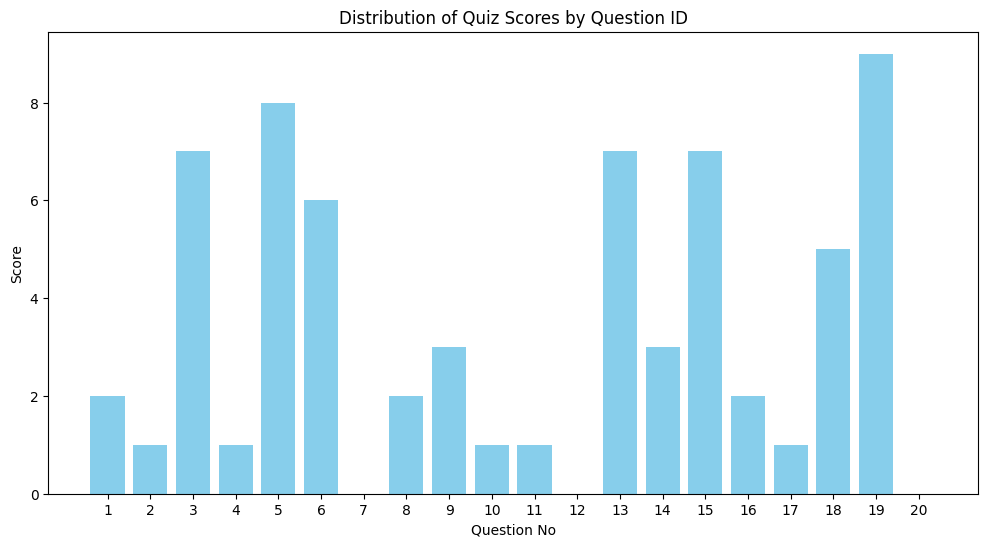


Plotting bar graph for the perfect scores...


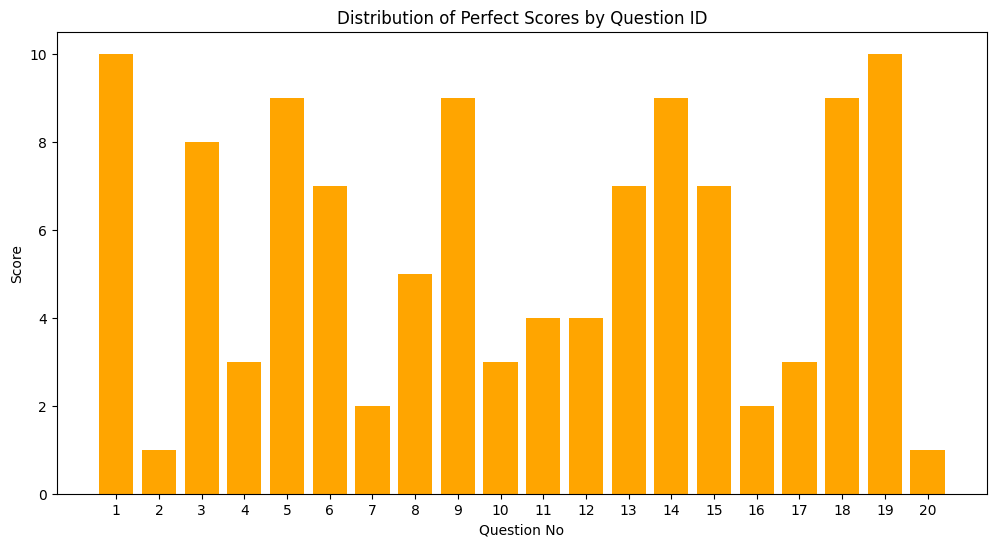


Number of IT and CS students...


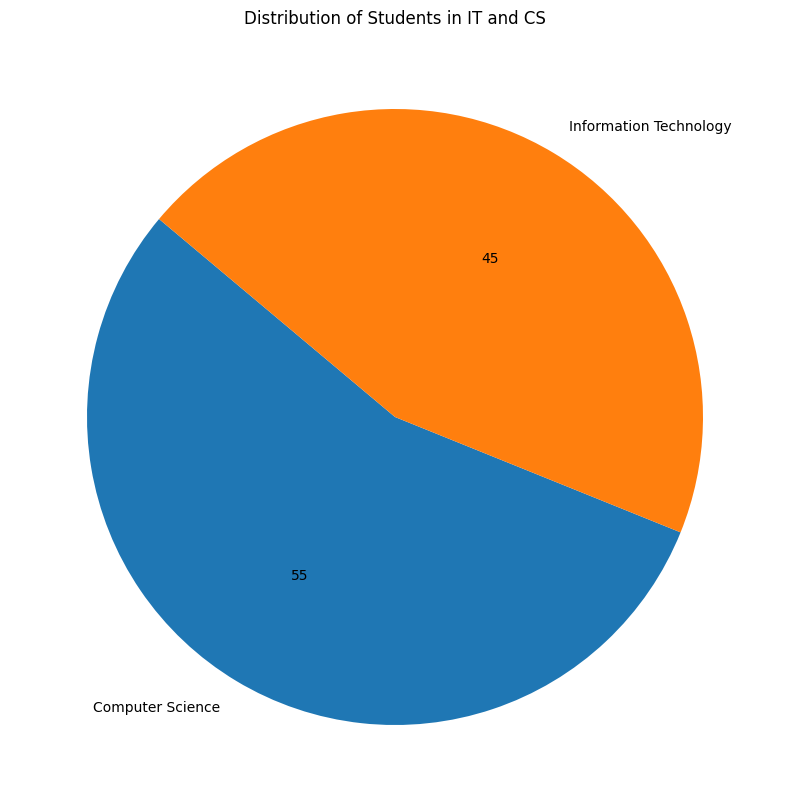

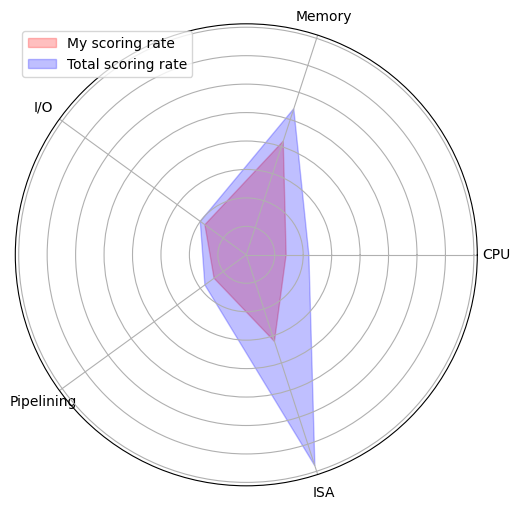

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mysql.connector
import seaborn as sns
from matplotlib.ticker import PercentFormatter

# Database connection
connection = mysql.connector.connect(
    host='localhost',
    port=3306,
    database='school_system',  # Ensure this is the correct database name
    user='root',
    password=''  # Provide your MySQL password here
)

cursor = connection.cursor()

# Fetch scores and question IDs (assuming there's a question_id column)
cursor.execute("SELECT question_id, score FROM sample_answered_question")
data = cursor.fetchall()

# Convert fetched data to DataFrame
df_scores = pd.DataFrame(data, columns=['question_id', 'score'])

# Group by question_id and get scores (if you want to aggregate scores, e.g., mean or sum)
# For simplicity, we will use the score directly here assuming each question_id has unique scores
score_counts = df_scores.groupby('question_id')['score'].mean()  # You can use sum() or another aggregation method if needed

# Bar graph for quiz scores from the database
print("\nPlotting bar graph for the quiz scores of students...")
plt.figure(figsize=(12, 6))
plt.bar(score_counts.index, score_counts.values, color='skyblue')
plt.xlabel('Question No')
plt.ylabel('Score')
plt.title('Distribution of Quiz Scores by Question ID')
plt.xticks(score_counts.index)  # Show all question IDs on x-axis
plt.show()

# Fetch question total points data
cursor.execute("SELECT question_id, question_total_point FROM sample_answered_question")
points_data = cursor.fetchall()

# Convert fetched data to DataFrame
df_points = pd.DataFrame(points_data, columns=['question_id', 'question_total_point'])

# Group by question_id and get total points (assuming the points represent perfect scores)
perfect_score_counts = df_points.groupby('question_id')['question_total_point'].max()  # Use max() or another appropriate aggregation

# Bar graph for perfect scores
print("\nPlotting bar graph for the perfect scores...")
plt.figure(figsize=(12, 6))
plt.bar(perfect_score_counts.index, perfect_score_counts.values, color='orange')
plt.xlabel('Question No')
plt.ylabel('Score')
plt.title('Distribution of Perfect Scores by Question ID')
plt.xticks(perfect_score_counts.index)  # Show all question IDs on x-axis
plt.show()

cursor.execute("SELECT department FROM student_account")
data = cursor.fetchall()

# Convert fetched data to DataFrame
df_identity = pd.DataFrame(data, columns=['department'])

print("\nNumber of IT and CS students...")
department_counts = df_identity['department'].value_counts()
plt.figure(figsize=(10, 10))
plt.pie(department_counts, labels=department_counts.index, autopct='%1.0f', startangle=140)
plt.title('Distribution of Students in IT and CS')
plt.show()

# Radar Chart
categories = ["CPU","Memory", "I/O", "Pipelining", "ISA"]

cursor.execute("SELECT SUM(score), SUM(question_total_point) FROM sample_answered_question WHERE question_category = 'CPU'")
result = cursor.fetchone()
cpu = result[0]  # Sum of scores
cpu_total = result[1]  # Sum of question total points

cursor.execute("SELECT SUM(score), SUM(question_total_point) FROM sample_answered_question WHERE question_category = 'MEM'")
result = cursor.fetchone()
memory = result[0]  # Sum of scores
memory_total = result[1]  # Sum of question total points

cursor.execute("SELECT SUM(score), SUM(question_total_point) FROM sample_answered_question WHERE question_category = 'I/O'")
result = cursor.fetchone()
io = result[0]  # Sum of scores
io_total = result[1]  # Sum of question total points

cursor.execute("SELECT SUM(score), SUM(question_total_point) FROM sample_answered_question WHERE question_category = 'PIP'")
result = cursor.fetchone()
pip = result[0]  # Sum of scores
pip_total = result[1]  # Sum of question total points

cursor.execute("SELECT SUM(score), SUM(question_total_point) FROM sample_answered_question WHERE question_category = 'ISA'")
result = cursor.fetchone()
isa = result[0]  # Sum of scores
isa_total = result[1]  # Sum of question total points

my_scores = [cpu, memory, io, pip, isa]  # Example data
total_scores = [cpu_total, memory_total, io_total, pip_total, isa_total]  # Example data

# Number of variables
num_vars = len(categories)

# Compute angle of each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The radar chart is circular, so we need to "complete the loop"
my_scores += my_scores[:1]
total_scores += total_scores[:1]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.fill(angles, my_scores, color='red', alpha=0.25)
ax.fill(angles, total_scores, color='blue', alpha=0.25)
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
plt.legend(['My scoring rate', 'Total scoring rate'], loc='upper left')
plt.show()

# Close the cursor and connection
cursor.close()
connection.close()
